## <span style="color:blue">CO<sub>2</sub> Emissions</span>

#### <span style="color:blue">Step I - Data Collection</span>

I chose to work on "Data Portal for Cities" API :  
https://dataportalforcities.org/api  
This API offers free and open access to city greenhouse gas inventory emission data sets.

A valid API URL string is constructed as follows:  
https://dataportalforcities.org/api/emissions?city_id=[city_idvalue]&year=[year]&sector=[sector]&scope=[scope]

adress
calling for the api
uraping extracting response
cleaning the response for pandas making a data frame

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests 

In [2]:
# Define the API endpoint URL
def fetch_emissions_data(city_id, year):
    """Fetches emissions data for a given city and year"""
    api_url = f'https://dataportalforcities.org/api/emissions?cityid={city_id}&year={year}&scope=total'
    response = requests.get(api_url)
    data = response.json()
    return data

In [3]:
def extract_emissions_rows(data):
    """Extracts emissions data rows from the API response"""
    rows = []
    for sector_data in data['data']:
        sector = sector_data['sector']
        for emission in sector_data.get('emissions', []):
            rows.append({
                'cityid': data['cityid'],
                'city_name': data['city_name'],
                'adm1id': data['adm1id'],
                'adm1_name': data['adm1_name'],
                'countryid': data['countryid'],
                'country_name': data['country_name'],
                'regionid': data['regionid'],
                'region_name': data['region_name'],
                'year': data['year'],
                'population': data['population'],
                'scope': data['scope'],
                'sector': sector,
                'sector_code': sector_data['sector_code'],
                'subsector': emission['subsector'],
                'subsector_code': emission['subsector_code'],
                'activity_amount_mj': emission['activity_amount_mj'],
                'co2e_total_ton': emission['co2e_total_ton'],
                'notation': emission['notation']
            })
    return pd.DataFrame(rows)

In [4]:
# List to store data for all cities
all_emissions = []

cities = {
    "NewYork": {'city_id': 5128581, 'year': 2015},
    "Washington": {'city_id': 4140963, 'year': 2015},
    "Copenhagen15": {'city_id': 2618424, 'year': 2015},
    "Copenhagen14": {'city_id': 2618424, 'year': 2014},
    "Copenhagen13": {'city_id': 2618424, 'year': 2013},
    "Copenhagen12": {'city_id': 2618424, 'year': 2012},
    "Copenhagen11": {'city_id': 2618424, 'year': 2011},
    "Copenhagen10": {'city_id': 2618424, 'year': 2010}
}

# Loop through each city and fetch emissions data
for city, city_info in cities.items():
    city_id = city_info['city_id']
    year = city_info['year']
    print(f"Fetching data for {city} (City ID: {city_id}, Year: {year})...")
    
    # Fetch emissions data for the current city
    data = fetch_emissions_data(city_id, year)
    
    # Extract emissions data rows
    rows = extract_emissions_rows(data)
    
    # Add the data to the list
    all_emissions.append(rows)

# Concatenate all the city data into one DataFrame
all_emissions_raw_df = pd.concat(all_emissions, ignore_index=True)

Fetching data for NewYork (City ID: 5128581, Year: 2015)...
Fetching data for Washington (City ID: 4140963, Year: 2015)...
Fetching data for Copenhagen15 (City ID: 2618424, Year: 2015)...
Fetching data for Copenhagen14 (City ID: 2618424, Year: 2014)...
Fetching data for Copenhagen13 (City ID: 2618424, Year: 2013)...
Fetching data for Copenhagen12 (City ID: 2618424, Year: 2012)...
Fetching data for Copenhagen11 (City ID: 2618424, Year: 2011)...
Fetching data for Copenhagen10 (City ID: 2618424, Year: 2010)...


In [5]:
all_emissions_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cityid              192 non-null    int64 
 1   city_name           192 non-null    object
 2   adm1id              192 non-null    int64 
 3   adm1_name           192 non-null    object
 4   countryid           192 non-null    int64 
 5   country_name        192 non-null    object
 6   regionid            192 non-null    int64 
 7   region_name         192 non-null    object
 8   year                192 non-null    int64 
 9   population          192 non-null    int64 
 10  scope               192 non-null    object
 11  sector              192 non-null    object
 12  sector_code         192 non-null    object
 13  subsector           192 non-null    object
 14  subsector_code      192 non-null    object
 15  activity_amount_mj  192 non-null    object
 16  co2e_total_ton      192 no

In [6]:
all_emissions_raw_df.to_csv('all_emissions.csv', index=False)

In [7]:
all_emissions_raw_df = pd.read_csv('all_emissions.csv')

In [8]:
all_emissions_df = all_emissions_raw_df.drop(columns=['cityid', 'adm1id', 'adm1_name', 'countryid', 'countryid', 'regionid' , 'scope', 'sector_code', 'subsector_code', 'notation'])

Since the emmisions values are objects and not numbers,  
and the missing values should stay as is for stats later on 
(we can't fill in zero instead):

In [9]:
all_emissions_df['co2e_total_ton'] = pd.to_numeric(all_emissions_df['co2e_total_ton'], errors='coerce')
all_emissions_df['activity_amount_mj'] = pd.to_numeric(all_emissions_df['activity_amount_mj'], errors='coerce')

In [10]:
all_emissions_df['population'] = all_emissions_df['population'].astype('float')

In [11]:
pd.options.display.float_format = '{:,.0f}'.format

In [12]:
all_emissions_df.head()

,city_name,country_name,region_name,year,population,sector,subsector,activity_amount_mj,co2e_total_ton
0,New York,United States,North America,2015,"8,537,673",Stationary energy,Residential buildings,"212,589,270,471","9,526,082"
1,New York,United States,North America,2015,"8,537,673",Stationary energy,Commercial buildings & facilities,"280,200,068,276","9,296,281"
2,New York,United States,North America,2015,"8,537,673",Stationary energy,Institutional buildings & facilities,NaN,NaN
3,New York,United States,North America,2015,"8,537,673",Stationary energy,Industrial buildings & facilities,"21,783,651,862","833,316"
4,New York,United States,North America,2015,"8,537,673",Stationary energy,Agriculture,"782,881,841","18,612"


In [13]:
all_emissions_df['city_name'].value_counts()
#df['subsector'].value_counts()

city_name
Copenhagen municipality    144
New York                    24
Washington D.C.             24
Name: count, dtype: int64

In [14]:
all_emissions_df['sector'].value_counts()

sector
Stationary energy                     48
Transport                             40
Waste                                 32
Generation of grid-supplied energy    32
AFOLU                                 24
IPPU                                  16
Name: count, dtype: int64

In [15]:
all_emissions_df['subsector'].value_counts()

subsector
Residential buildings                   8
Commercial buildings & facilities       8
Heat/cold generation                    8
CHP Generation                          8
Electricity-only generation             8
Other AFOLU                             8
Land use                                8
Livestock                               8
Produce use                             8
Industrial process                      8
Wastewater                              8
Incineration and open burning           8
Biological treatment                    8
Solid waste disposal                    8
Off-road                                8
Aviation                                8
Waterborne navigation                   8
Rail                                    8
On-road                                 8
Fugitive emissions                      8
Agriculture                             8
Industrial buildings & facilities       8
Institutional buildings & facilities    8
Local renewable generati

In [16]:
all_emissions_df['sector_subsector'] = all_emissions_df['sector']+' & '+all_emissions_df['subsector']

In [ ]:
all_emissions_df['sector_subsector'].value_counts()

sector_subsector
Stationary energy & Residential buildings                           8
Stationary energy & Commercial buildings & facilities               8
Generation of grid-supplied energy & Heat/cold generation           8
Generation of grid-supplied energy & CHP Generation                 8
Generation of grid-supplied energy & Electricity-only generation    8
AFOLU & Other AFOLU                                                 8
AFOLU & Land use                                                    8
AFOLU & Livestock                                                   8
IPPU & Produce use                                                  8
IPPU & Industrial process                                           8
Waste & Wastewater                                                  8
Waste & Incineration and open burning                               8
Waste & Biological treatment                                        8
Waste & Solid waste disposal                                        8
Tra

In [18]:
all_emissions_df.head()

,city_name,country_name,region_name,year,population,sector,subsector,activity_amount_mj,co2e_total_ton,sector_subsector
0,New York,United States,North America,2015,"8,537,673",Stationary energy,Residential buildings,"212,589,270,471","9,526,082",Stationary energy & Residential buildings
1,New York,United States,North America,2015,"8,537,673",Stationary energy,Commercial buildings & facilities,"280,200,068,276","9,296,281",Stationary energy & Commercial buildings & fac...
2,New York,United States,North America,2015,"8,537,673",Stationary energy,Institutional buildings & facilities,NaN,NaN,Stationary energy & Institutional buildings & ...
3,New York,United States,North America,2015,"8,537,673",Stationary energy,Industrial buildings & facilities,"21,783,651,862","833,316",Stationary energy & Industrial buildings & fac...
4,New York,United States,North America,2015,"8,537,673",Stationary energy,Agriculture,"782,881,841","18,612",Stationary energy & Agriculture


In [19]:
country_sum = all_emissions_df.groupby(['country_name'],as_index=False)['co2e_total_ton'].agg(['sum'])

In [20]:
country_sum

,country_name,sum
0,Denmark,"4,401,269"
1,United States,"98,634,725"


In [21]:
type(country_sum)

pandas.core.frame.DataFrame

In [22]:
sector_sum = all_emissions_df.groupby(['country_name','sector_subsector'],as_index=False).co2e_total_ton.agg(['sum'])
sector_sum.head()

,country_name,sector_subsector,sum
0,Denmark,AFOLU & Land use,0
1,Denmark,AFOLU & Livestock,0
2,Denmark,AFOLU & Other AFOLU,0
3,Denmark,Generation of grid-supplied energy & CHP Gener...,0
4,Denmark,Generation of grid-supplied energy & Electrici...,0


In [23]:
sums_df = pd.merge(country_sum,sector_sum, on=['country_name','country_name'],how='inner')

In [24]:
sums_df.head()

,country_name,sum_x,sector_subsector,sum_y
0,Denmark,"4,401,269",AFOLU & Land use,0
1,Denmark,"4,401,269",AFOLU & Livestock,0
2,Denmark,"4,401,269",AFOLU & Other AFOLU,0
3,Denmark,"4,401,269",Generation of grid-supplied energy & CHP Gener...,0
4,Denmark,"4,401,269",Generation of grid-supplied energy & Electrici...,0


In [25]:
pd.options.display.float_format = '{:,.2f}'.format

In [26]:
sums_df['percentage %'] = (sums_df['sum_y'] / sums_df['sum_x'])*100

In [27]:
sums_df

,country_name,sum_x,sector_subsector,sum_y,percentage %
0,Denmark,"4,401,268.76",AFOLU & Land use,0.00,0.00
1,Denmark,"4,401,268.76",AFOLU & Livestock,0.00,0.00
2,Denmark,"4,401,268.76",AFOLU & Other AFOLU,0.00,0.00
3,Denmark,"4,401,268.76",Generation of grid-supplied energy & CHP Gener...,0.00,0.00
4,Denmark,"4,401,268.76",Generation of grid-supplied energy & Electrici...,0.00,0.00
5,Denmark,"4,401,268.76",Generation of grid-supplied energy & Heat/cold...,0.00,0.00
6,Denmark,"4,401,268.76",Generation of grid-supplied energy & Local ren...,0.00,0.00
7,Denmark,"4,401,268.76",IPPU & Industrial process,0.00,0.00
8,Denmark,"4,401,268.76",IPPU & Produce use,0.00,0.00
9,Denmark,"4,401,268.76",Stationary energy & Agriculture,451.01,0.01


In [28]:
sector_sum.describe()

,sum
count,48.00
mean,"2,146,583.20"
std,"6,596,405.54"
min,0.00
25%,0.00
50%,0.00
75%,"241,353.52"
max,"37,990,676.89"


In [29]:
all_emissions_df['country_name'].value_counts()

country_name
Denmark          144
United States     48
Name: count, dtype: int64

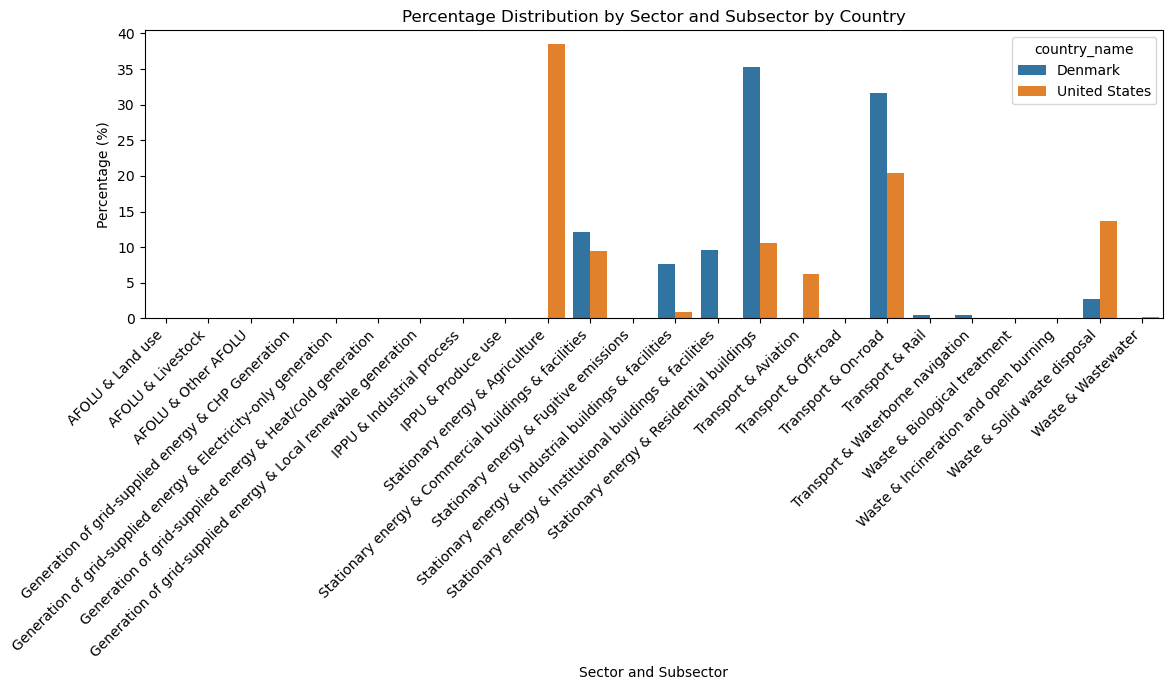

In [30]:
# Create a bar plot
plt.figure(figsize=(12, 7))  # Increased figure size for better readability
bar_plot = sns.barplot(x='sector_subsector', y='percentage %', hue='country_name', data=sums_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Sector and Subsector')
plt.ylabel('Percentage (%)')
plt.title('Percentage Distribution by Sector and Subsector by Country')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

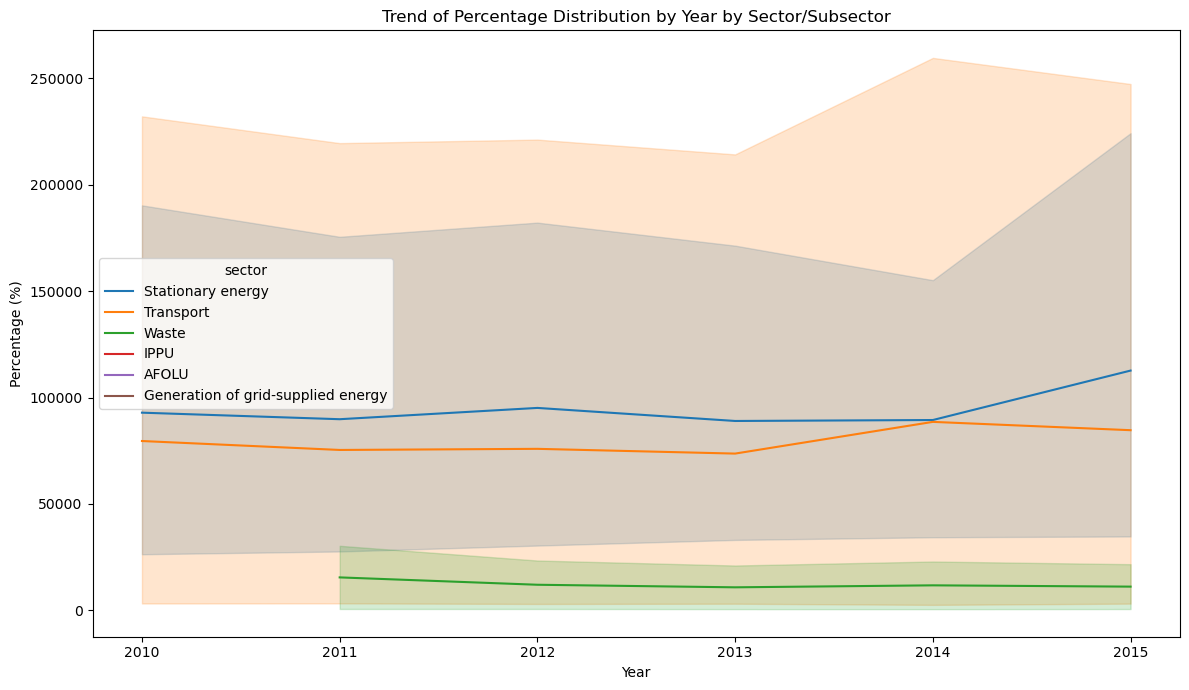

In [37]:
# Create a line plot with hue
plt.figure(figsize=(12, 7))  # Increased figure size for better readability
line_plot = sns.lineplot(x='year', y='co2e_total_ton', hue='sector', data=all_emissions_df[all_emissions_df['country_name'] == 'Denmark'])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('Trend of Percentage Distribution by Year by Sector/Subsector')

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()